In [11]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from collections import Counter


breast_cancer_df = pd.read_csv('breast-cancer.csv')
covid_df = pd.read_csv('covid.csv')

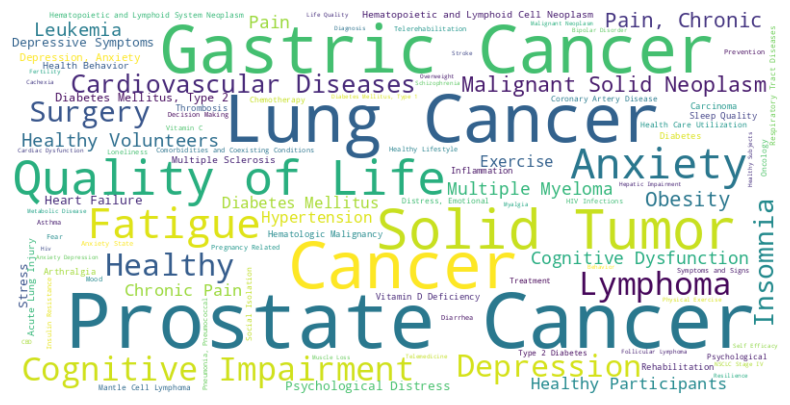

,Condition,Count_x,Count_y,Average_Count
1,Prostate Cancer,81,1,41.0
2,Lung Cancer,58,1,29.5
6,Gastric Cancer,58,1,29.5
0,Cancer,42,14,28.0
8,Solid Tumor,37,2,19.5
4,Quality of Life,33,5,19.0
3,Fatigue,17,11,14.0
21,Anxiety,13,16,14.5
29,Lymphoma,13,4,8.5
15,Surgery,12,2,7.0


In [23]:
# Split the 'Conditions' column by '|'
conditions_breast_cancer = breast_cancer_df['Conditions'].str.split('|')
conditions_covid = covid_df['Conditions'].str.split('|')

# Flatten the list
conditions_breast_cancer = [item for sublist in conditions_breast_cancer for item in sublist]
conditions_covid = [item for sublist in conditions_covid for item in sublist]

# Count the occurrences of each condition
counter_breast_cancer = Counter(conditions_breast_cancer)
counter_covid = Counter(conditions_covid)

# Convert the result to a DataFrame for better visualization
conditions_breast_cancer_df = pd.DataFrame(counter_breast_cancer.items(), columns=['Condition', 'Count'])
conditions_covid_df = pd.DataFrame(counter_covid.items(), columns=['Condition', 'Count'])

# Find common conditions
common_conditions = pd.merge(conditions_breast_cancer_df, conditions_covid_df, on='Condition', how='inner')

# Create a new column 'Average_Count' that is the average of 'Count_x' and 'Count_y'
common_conditions['Average_Count'] = (common_conditions['Count_x'] + common_conditions['Count_y']) / 2

# Create a new WordCloud object
wordcloud = WordCloud(background_color='white', width=800, height=400)

# Generate the word cloud using the average frequencies of the conditions
wordcloud.generate_from_frequencies(frequencies=common_conditions.set_index('Condition')['Average_Count'])

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# get the top 10 common conditions
top_10_common_conditions = common_conditions.sort_values(by=['Count_x', 'Count_y'], ascending=False).head(10)
top_10_common_conditions

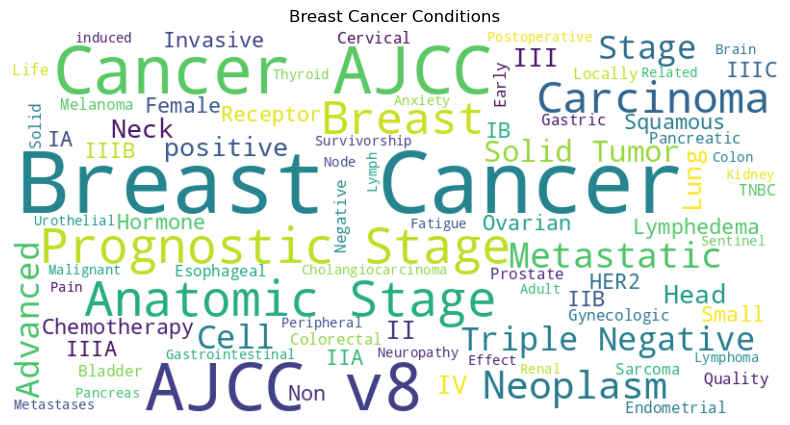

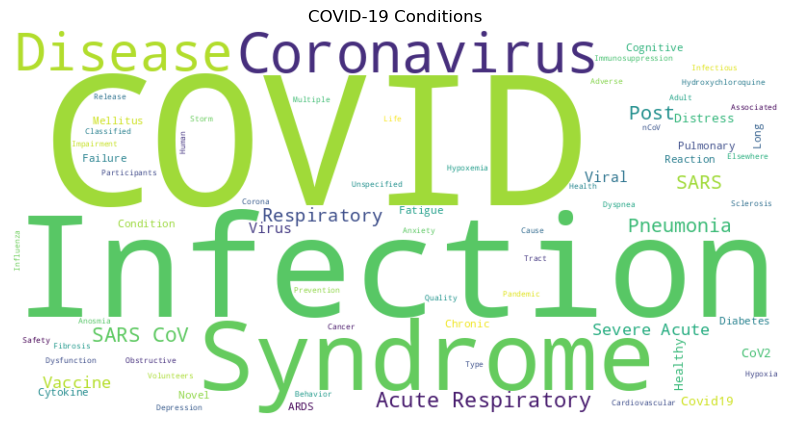

In [13]:
# Limit to top 100 words
top_words_breast_cancer = conditions_breast_cancer_df.nlargest(100, 'Count')
top_words_covid = conditions_covid_df.nlargest(100, 'Count')

# Create new WordCloud objects
wordcloud_breast_cancer = WordCloud(background_color='white', width=800, height=400)
wordcloud_covid = WordCloud(background_color='white', width=800, height=400)

# Generate the word clouds
wordcloud_breast_cancer.generate(' '.join(top_words_breast_cancer['Condition']))
wordcloud_covid.generate(' '.join(top_words_covid['Condition']))

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_breast_cancer, interpolation='bilinear')
plt.title('Breast Cancer Conditions')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_covid, interpolation='bilinear')
plt.title('COVID-19 Conditions')
plt.axis('off')
plt.show()

In [14]:
conditions_breast_cancer_df

,Condition,Count
0,Malignant Breast Neoplasm,4
1,TNBC - Triple-Negative Breast Cancer,25
2,BRCA1 Mutation,10
3,BRCA2 Mutation,9
4,Breast Cancer,1430
...,...,...
2365,Uterine Cervical Cancer,1
2366,Uterine Cervix Cancer,1
2367,Uterine Cervical Neoplasm,1
2368,Early Detection of Cancer,1
